# Exploring the Airbnb data  of Buenos Aires, Argentina

<a id='contents'></a>
## Table of Contents

### [I: Business Understanding](#bus)
### [II: Dependencies](#dep)
### [III: Data Understanding](#dat)
### [IV: Data Wrangling](#datw)
  ##### [1. Missing data](#datw1)
  ##### [2. Data types](#datw2)
  ##### [3. Remove unnecessary columns](#datw3)
### [V: Data Analysis](#da)
  ##### [1. What's the most common acomodation per type of room?](#da1)
  ##### [2. What's the most frequency neighborhood?](#da2)
  ##### [3. How's the interaction between price and type of accomodation?](#da3)
  ##### [4. How's the interaction between price and location?](#da4)
  ##### [5. What's the best period of the year to travel to Buenos Aires?](#da5)
### [VI: Conclusion](#con)

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
#path = '/content/drive/My Drive/Data Science/Udacity Nanodegree/airbnb_buenos_aires'
path =  './'

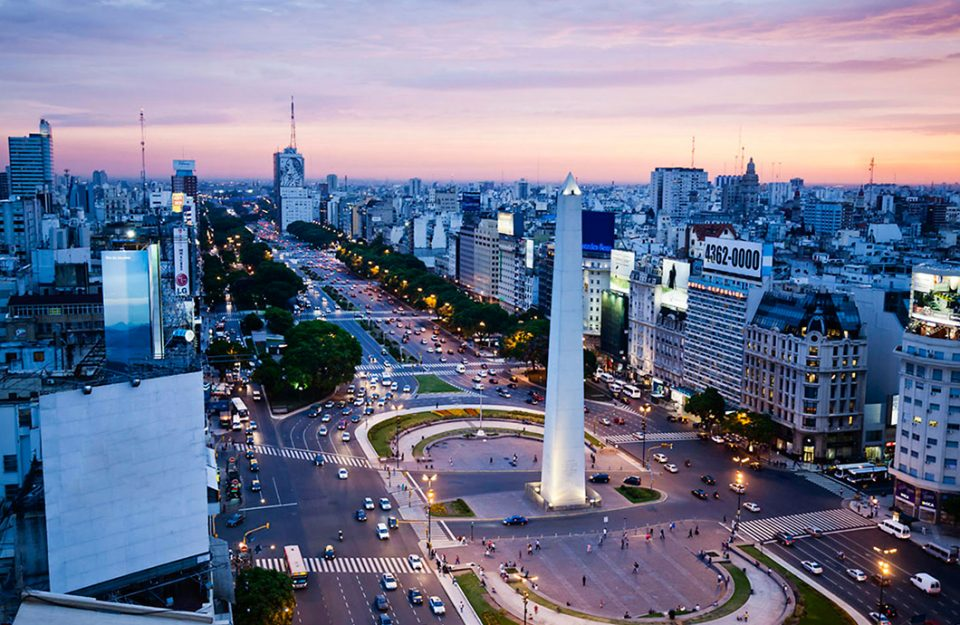

In [2]:
from IPython.display import Image
Image(filename= path+ '/images/buenos_aires_background.jpg') 

## <a id="bus">I: Business Understanding</a>

In the following notebook the AirBnB possibilities in Buenos Aires, Argentina, will be what is ofered and research how the location and season of the year influencie the price.

The dataset is a picture of all available AirBnB listings in Buenos Aires, Argentina at the 15 March, 2019. Additionaly, the correspondings booking calendar is provided from 23 February, 2021 until one year into the future.

In this notebook, the goal is to make the process of CRISP-DM with the datasets of Airbnb, Buenos Aires, availables on: http://insideairbnb.com/get-the-data.html

Buenos Aires is one of the most visited cities in the world, if we consider only latin america, is the top three cities.
Below, we have some question that everyone who wants to travel to somewhere wuold like to know before booking a place.

1. What's the most common acomodation per type of room?
2. What's the most frequency neighborhood?
3. How's the interaction between price and type of accomodation?
4. How's the interaction between price and location?
5. What's the best period of the year to travel to Buenos Aires?

## <a id="dep">II: Dependencies</a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

## <a id="dat">III: Data Understanding</a>

In the following section covers the exploration of all datasets avaiables. There are four ".csv" files. They are: listings.csv, reviews.csv, neighborood.csv and calendar.csv.

Now, we let's explore which one individually. 

### Listings

Description: Summary information and metrics for listings in Buenos Aires (good for visualisations).

In [4]:
df_listings = pd.read_csv(path+ '/data/listings.csv')
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60367,-58.40875,Entire home/apt,4473,3,1,2011-01-31,0.01,1,365
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,5368,2,26,2019-11-28,0.25,1,327
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,2415,1,20,2017-12-11,0.15,1,365
3,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2684,1,1,2018-12-18,0.04,7,365
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2684,1,0,NaN,NaN,7,365


In [5]:
df_listings.shape

(20243, 16)

In [6]:
df_listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.024300e+04,2.024300e+04,0.0,20243.000000,20243.000000,2.024300e+04,20243.000000,20243.000000,14032.000000,20243.000000,20243.000000
mean,2.814316e+07,1.075708e+08,NaN,-34.592497,-58.415163,5.172270e+03,6.586870,16.280097,0.671542,7.382651,226.623771
std,1.363630e+07,1.051090e+08,NaN,0.017958,0.029515,6.713130e+04,20.817938,33.464033,0.803501,16.704003,133.867058
min,6.283000e+03,2.616000e+03,NaN,-34.697370,-58.530720,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.845333e+07,1.403147e+07,NaN,-34.603040,-58.434500,1.612000e+03,2.000000,0.000000,0.130000,1.000000,89.000000
50%,3.135076e+07,6.764858e+07,NaN,-34.591680,-58.414350,2.507000e+03,3.000000,3.000000,0.370000,2.000000,242.000000
75%,3.936798e+07,1.877499e+08,NaN,-34.582140,-58.391345,4.030000e+03,5.000000,17.000000,0.920000,4.000000,364.000000
max,4.829232e+07,3.896516e+08,NaN,-34.535660,-58.355410,8.946021e+06,1100.000000,500.000000,7.140000,124.000000,365.000000


In [7]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20243 entries, 0 to 20242
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20243 non-null  int64  
 1   name                            20238 non-null  object 
 2   host_id                         20243 non-null  int64  
 3   host_name                       20236 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   20243 non-null  object 
 6   latitude                        20243 non-null  float64
 7   longitude                       20243 non-null  float64
 8   room_type                       20243 non-null  object 
 9   price                           20243 non-null  int64  
 10  minimum_nights                  20243 non-null  int64  
 11  number_of_reviews               20243 non-null  int64  
 12  last_review                     

Columns with null values: 
['name', 'host_name', 'neighbourhood_group', 'last_review', 'reviews_per_month'] 

Count of null values per column: 
 id                                    0
name                                  5
host_id                               0
host_name                             7
neighbourhood_group               20243
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        6211
reviews_per_month                  6211
calculated_host_listings_count        0
availability_365                      0
dtype: int64 


<AxesSubplot:>

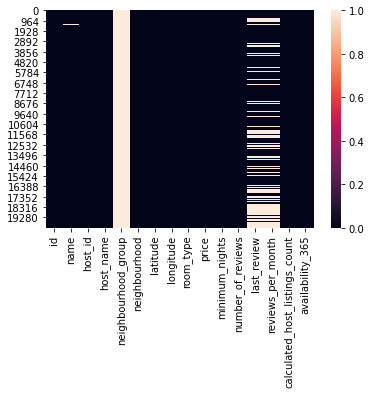

In [8]:
print('Columns with null values: \n{} \n'.format(list(df_listings.columns[df_listings.isnull().sum()>0])))

print('Count of null values per column: \n {} '.format(np.sum(df_listings.isnull())))

sns.heatmap(df_listings.isnull()) # checking for null values

In [9]:
df_listings.id.is_unique

True

The listings datasets will be excelent because the column, called id, has unique values and all places to book. 

The columns called name, host_name, neighbouhood_group, last_review and reviews_per_month have null values. But, the information there isn't necessary to answer the five questions. So, these null values will be ignored without any treatment.

This dataframe will help us to answer the first four questions.

It's important to mention that all values related to **price are in daily price in local currency**, as mentioned in data inside airbnb dictionary

### Reviews

Description: Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).

In [10]:
df_reviews = pd.read_csv(path+ '/data/reviews.csv')
df_reviews.head()

,listing_id,date
0,6283,2011-01-31
1,11508,2012-07-02
2,11508,2012-12-26
3,11508,2013-01-05
4,11508,2013-07-28


In [11]:
df_reviews.shape

(329558, 2)

The "reviews.csv" aren't useful for the purposes of questions. So, it won't be used along the project. If the goal of this notebook involves some study about the historicity of bookings, it would be useful, but it is not this case.

### Neighbourhoods

Description: Neighbourhood list for geo filter. Sourced from city or open source GIS files.



In [12]:
df_neighbourhoods = pd.read_csv(path+ '/data/neighbourhoods.csv')
df_neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Agronomia
1,NaN,Almagro
2,NaN,Balvanera
3,NaN,Barracas
4,NaN,Belgrano


In [13]:
df_neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        49 non-null     object 
dtypes: float64(1), object(1)
memory usage: 912.0+ bytes


In [14]:
df_neighbourhoods.shape

(49, 2)

As we can see above, this dataset won't be useful, in order to the column, called neighbourhood_group, has all rows nulls. Since this column mentioned before is all null, there isn't any important information here.

### Calendar

Description: Detailed Calendar Data for listings in Buenos Aires



In [15]:
df_calendar = pd.read_csv(path+ '/data/calendar.csv')
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6283,2021-02-24,t,"$4,473.00","$4,473.00",3.0,30.0
1,53097,2021-02-24,f,"$3,578.00","$3,578.00",2.0,1125.0
2,53097,2021-02-25,f,"$3,578.00","$3,578.00",2.0,1125.0
3,53097,2021-02-26,f,"$3,578.00","$3,578.00",2.0,1125.0
4,53097,2021-02-27,f,"$3,578.00","$3,578.00",2.0,1125.0


In [16]:
df_calendar.shape

(7389042, 7)

In [17]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7389042 entries, 0 to 7389041
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 394.6+ MB


After analysing all datasets. Only the "listings.csv" and "calendar.csv" will be necessary to solve the business problem.

## <a id="datW">IV: Data Wrangling</a>

### <a id="datw1">1. Missing data</a>

In [18]:
number_of_rows_previous_df = df_calendar.shape[0]
print('Number of rows at the dataframe without removing null values {}\n\n'.format(number_of_rows_previous_df))

Number of rows at the dataframe without removing null values 7389042




In [19]:
df_calendar = df_calendar.dropna(subset=['price','adjusted_price'],axis=0)

print('Columns with null values: \n{} \n'.format(list(df_calendar.columns[df_calendar.isnull().sum()>0])))
print('Count of null values per column: \n {}\n\n '.format(np.sum(df_calendar.isnull())))

number_of_rows_current_df = df_calendar.shape[0]
print('Number of rows at the dataframe after removing null values {}\n\n'.format(number_of_rows_current_df))

percent_removed_rows = (number_of_rows_previous_df-number_of_rows_current_df)/number_of_rows_previous_df
print('Percent of removed rows {:.10f}\n\n'.format(percent_removed_rows))


Columns with null values: 
['minimum_nights', 'maximum_nights'] 

Count of null values per column: 
 listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    708
maximum_nights    708
dtype: int64

 
Number of rows at the dataframe after removing null values 7388871


Percent of removed rows 0.0000231424




The columns price and adjusted_price will be necessary for answering the question number five. In order to solve this, in the next step, as we have a few null rows near to 0.00002314 of the total, they will be removed. Talking about the column minimum_nights and maximum_nights, since won't be used, they will keep in the dataframe.

Now, it's ok, the columns minimum_nights and maximum_nights won't be used, because of this, there isn't a problem if we have null values there.

After this treatment, we can use both dataframes.


### <a id="datw2">2. Data types</a>

In [20]:
df_calendar["price"] = df_calendar["price"].replace("[\$,]", "", regex=True).astype(float)
df_calendar["adjusted_price"] = df_calendar[["adjusted_price"]].replace("[\$,]", "", regex=True).astype(float)
df_calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6283,2021-02-24,t,4473.0,4473.0,3.0,30.0
1,53097,2021-02-24,f,3578.0,3578.0,2.0,1125.0
2,53097,2021-02-25,f,3578.0,3578.0,2.0,1125.0


### <a id="datw3">3. Remove unnecessary columns</a>

In [21]:
df_listings = df_listings.drop(columns=['neighbourhood_group'])

Removing the column because there isn't information.

## <a id="da">V: Data Analysis</a>

### <a id="da1">1. What's the most common acomodation per type of room?</a>

Entire home/apt    15924
Private room        3702
Shared room          433
Hotel room           184
Name: room_type, dtype: int64

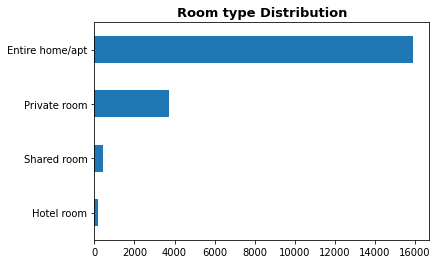

In [22]:
df_listings['room_type'].value_counts(ascending=True).plot(kind="barh")
plt.title("Room type Distribution", fontsize=13, weight='bold' );
plt.savefig(path+ "/images/distribuition_per_room_type.png")

df_listings['room_type'].value_counts()

In [23]:
df_listings['room_type'].value_counts(normalize=True)

Entire home/apt    0.786642
Private room       0.182878
Shared room        0.021390
Hotel room         0.009090
Name: room_type, dtype: float64

**Answer:** 

With the plot above, the analysis is about the type of room, with the entire home/apt representing 78.7%.

### <a id="da2">2. What's the most frequency neighborhood?</a>

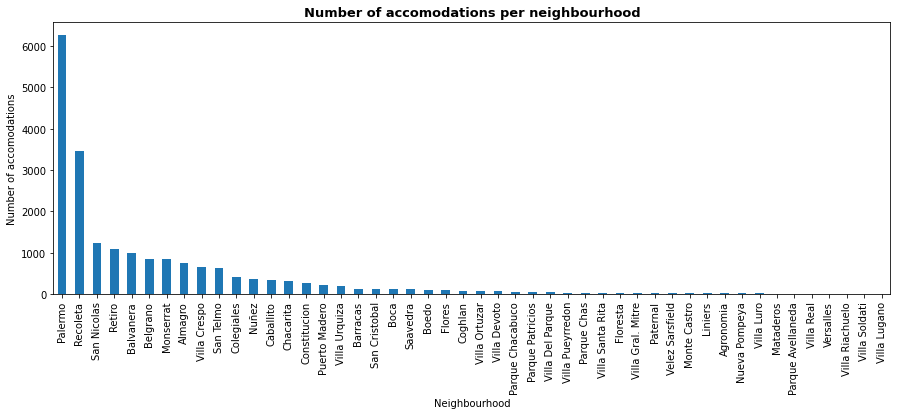

In [24]:
plt.figure(figsize=(15,5))
(df_listings['neighbourhood'].value_counts()).plot(kind = "bar");
plt.title("Number of accomodations per neighbourhood", fontsize=13, weight='bold' );
plt.xlabel("Neighbourhood");
plt.ylabel("Number of accomodations");

Because of a large number of neighbourhoods, the plot below focuses only on the top 10 more frequency places.

Percent of total dataframe: 82.90% 



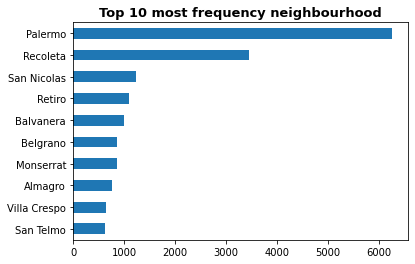

Palermo         0.309144
Recoleta        0.170775
San Nicolas     0.060959
Retiro          0.053895
Balvanera       0.049153
Belgrano        0.042336
Monserrat       0.042237
Almagro         0.037445
Villa Crespo    0.032357
San Telmo       0.030677
Name: neighbourhood, dtype: float64

In [25]:
percent_of_total = (df_listings['neighbourhood'].value_counts()[:10].sum())/df_listings['neighbourhood'].value_counts().sum()*100


print('Percent of total dataframe: {:.2f}% \n'.format(percent_of_total))
plt.title("Top 10 most frequency neighbourhood", fontsize=13, weight='bold' );
(df_listings['neighbourhood'].value_counts(ascending=True)[-10:]).plot(kind = "barh");
plt.savefig(path + "/images/distribuition_per_neighbourhood.png")
plt.show()
df_listings['neighbourhood'].value_counts(normalize=True)[:10]

**Answer:** 

According to the plot above, we can see that the top 10 neighbourhoods correspond to more than 80% of accommodations, Palermo and Recoleta for almost 60%, which shows us a very concentrated amount of bookings in those areas.


### <a id="da3">3. How's the interaction between price and type of accomodation?</a>

In [26]:
print('The average price is: {:,.2f} '.format(df_listings.price.sum()/(df_listings.shape[0])))

The average price is: 5,172.27 


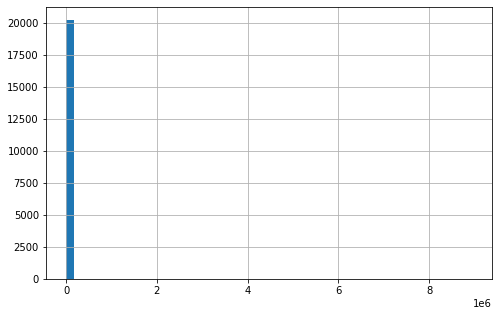

In [27]:
df_listings['price'].hist(bins=50, figsize = (8,5))
plt.show()

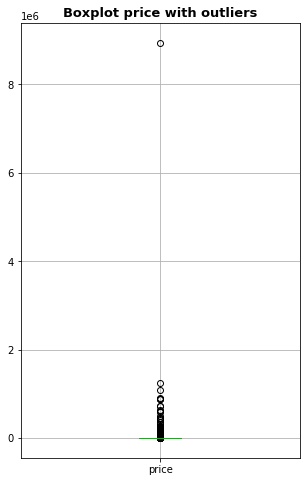

In [28]:
df_listings.boxplot(column = ["price"], figsize = (5,8));
plt.title("Boxplot price with outliers", fontsize=13, weight='bold');
plt.savefig(path + "/images/Boxplot_with_outliers.png")

As we can see, the dataset is very skewed. So, to solve this, we need to remove the outliers.

In [29]:
df_listings_without_outliers = df_listings[df_listings['price']<10000]

In [30]:
print('Now, the dataframe has {:.2f} of the original data'.format(df_listings_without_outliers.shape[0]/df_listings.shape[0]))

Now, the dataframe has 0.95 of the original data


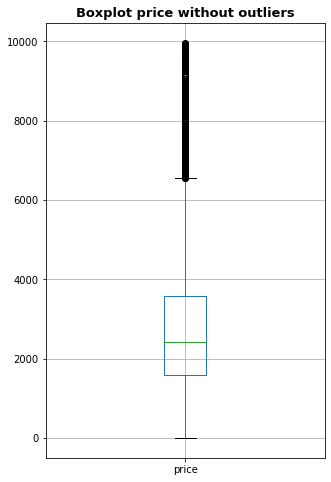

In [31]:
df_listings_without_outliers.boxplot(column = ["price"], figsize = (5,8));
plt.title("Boxplot price without outliers", fontsize=13, weight='bold');
plt.savefig(path + "/images/Boxplot_without_outliers.png")

In [32]:
print('The average price without outliers is: {:,.2f} '.format(df_listings_without_outliers.price.sum()/(df_listings.shape[0])))

The average price without outliers is: 2,790.35 


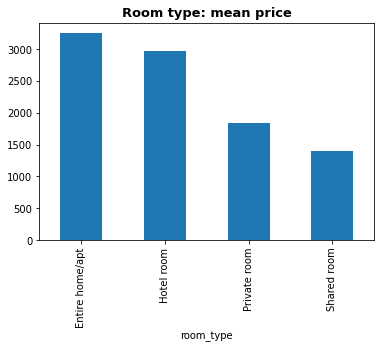

In [33]:
# bar chart: room type mean prices
(df_listings_without_outliers.groupby("room_type").mean()["price"].sort_values(ascending=False)).plot(kind = "bar");
plt.title("Room type: mean price", fontsize=13, weight='bold');
plt.savefig(path+ "/images/room_type_vs_price.png")

In [34]:
print("Data frame without otliers \n{}\n\n Original dataframe \n{}" .format(df_listings_without_outliers.groupby("room_type").mean()["price"].sort_values(ascending=False),df_listings.groupby("room_type").mean()["price"].sort_values(ascending=False)))

Data frame without otliers 
room_type
Entire home/apt    3251.835552
Hotel room         2968.468354
Private room       1836.180470
Shared room        1401.436019
Name: price, dtype: float64

 Original dataframe 
room_type
Hotel room         64067.266304
Shared room         5046.621247
Entire home/apt     5001.758917
Private room        2993.164506
Name: price, dtype: float64


**Answer:** 

In this question, we could analysi the price. The first thing necessary to do was remove the outliers, for the reason that it was distorcing the mean and all values, as the image of the first boxplot shows.

Following this treatment, about the type of room analysis, the shared types of booking as private room and shared room are cheaper than the other, it is almost half of the average price.

### <a id="da4">4. How's the interaction between price and location?</a>

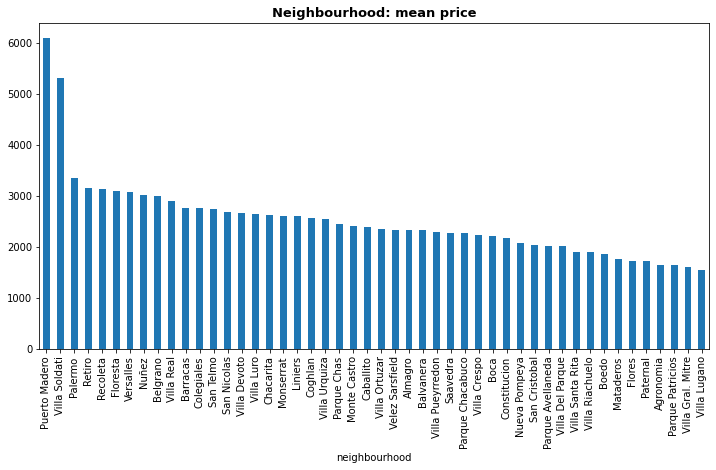

In [35]:
# bar chart: neighbourhood mean prices
plt.figure(figsize=(12,6))
(df_listings_without_outliers.groupby("neighbourhood").mean()["price"].sort_values(ascending=False)).plot(kind = "bar");
plt.title("Neighbourhood: mean price", fontsize=13, weight='bold');

Above, we can see the average values of price per neighbourhood. All of these are very close, except for the Villa Soldati and Puerto Madero that have almost double the mean than the other.

<Figure size 1368x1368 with 0 Axes>

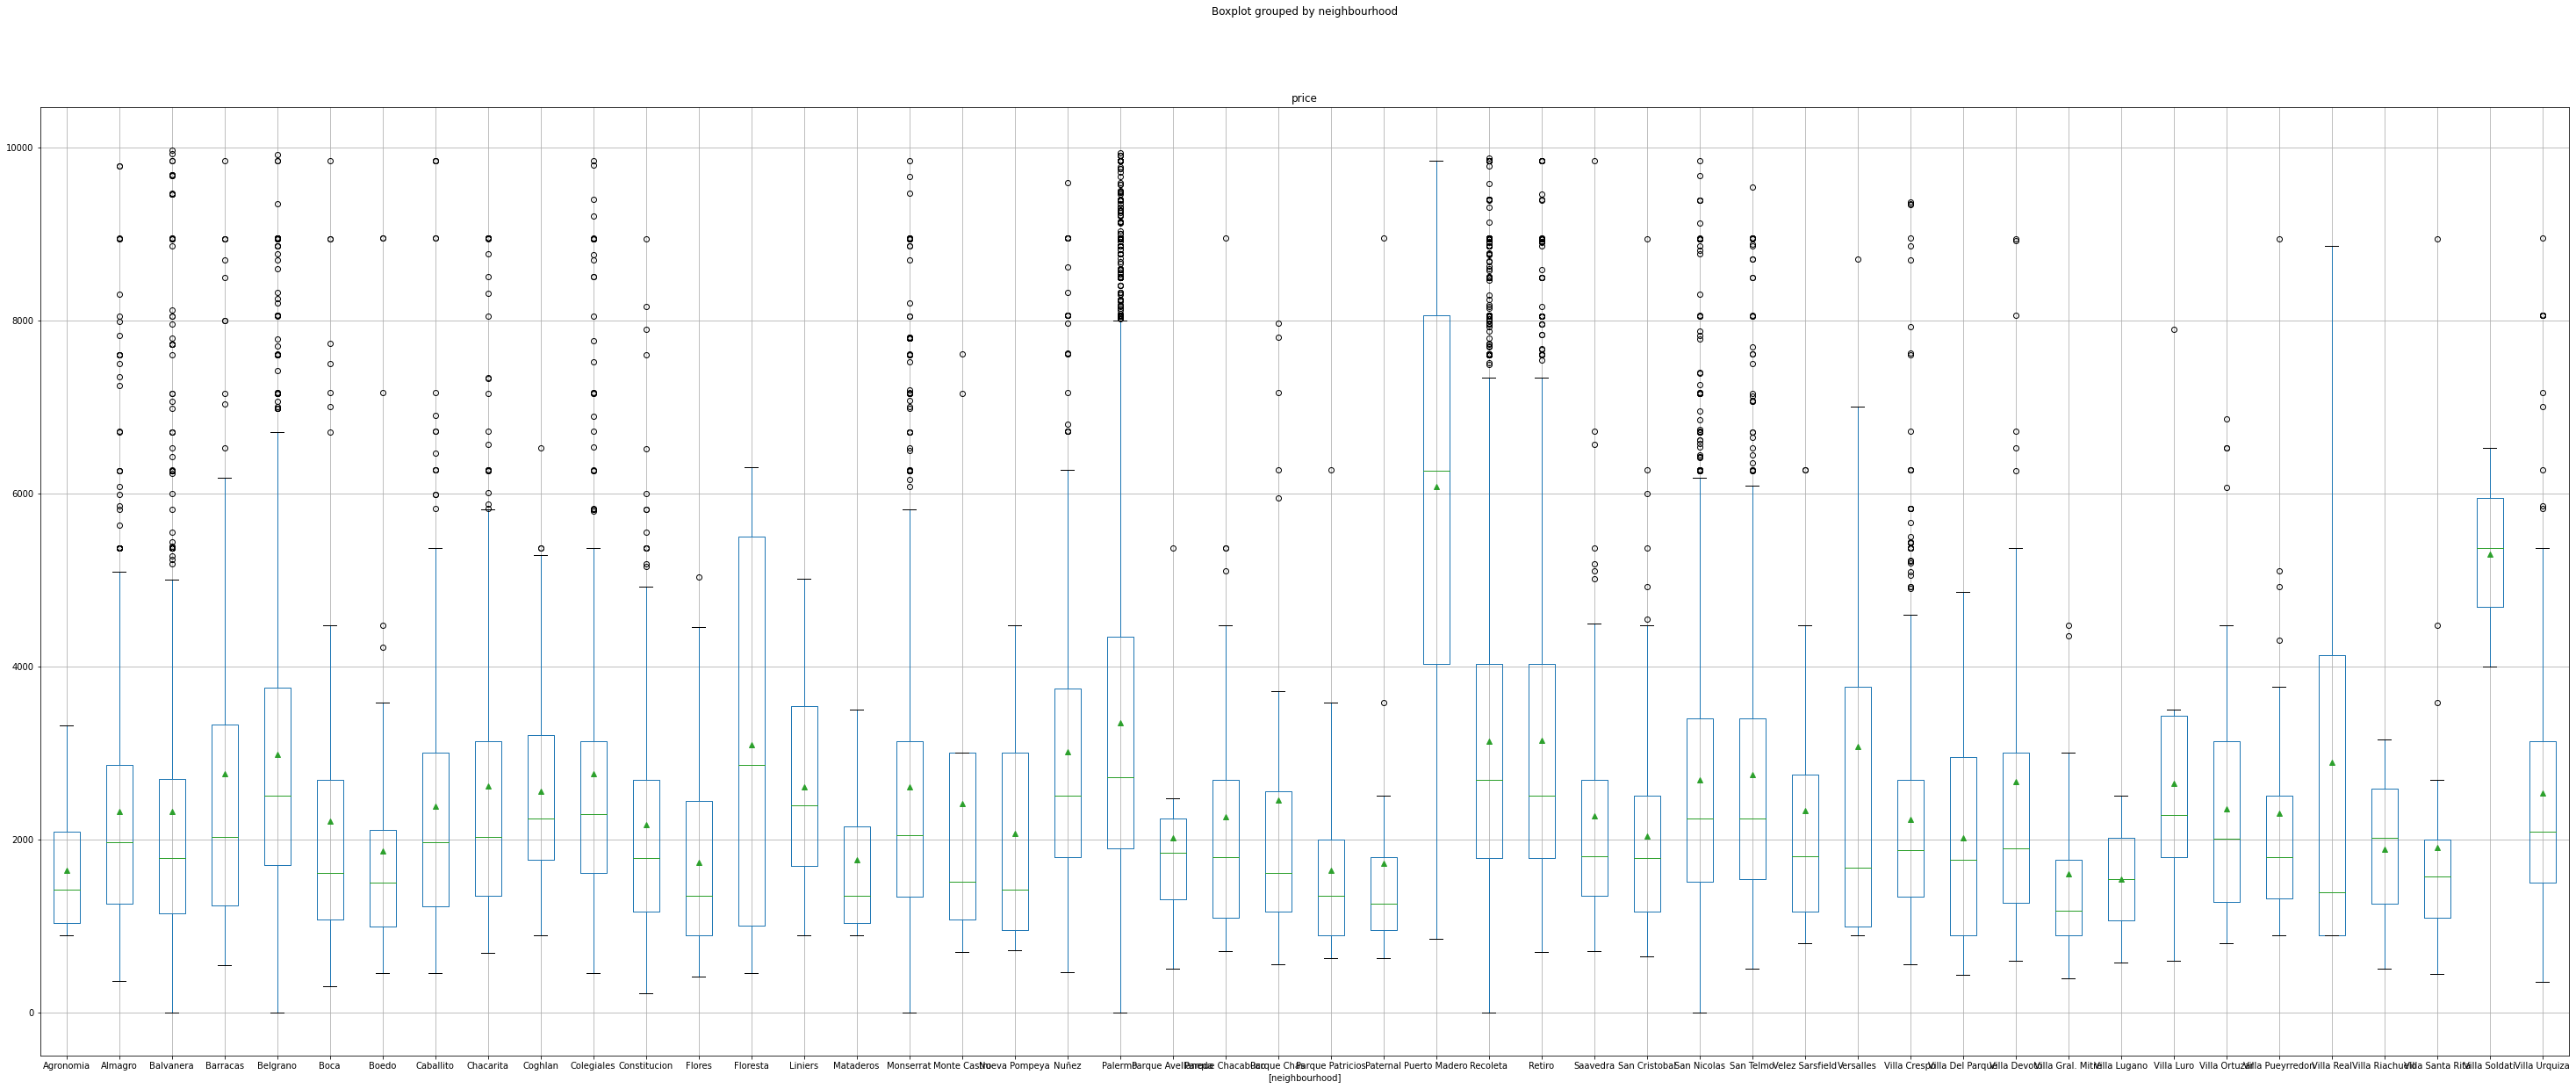

In [36]:
plt.figure(figsize=(19,19))
df_listings_without_outliers.boxplot(column = ["price"], by = ["neighbourhood"], figsize = (50,20), showmeans=True);

With this plot, we can see better the distribution of price. For example, the average that is near 75% of occurrences, is because we have some outliers.

In [37]:
df_listings.groupby("neighbourhood").describe()["price"].sort_values(by=['50%'], ascending = False)[:10]

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Puerto Madero,229.0,8831.152838,6398.506189,850.0,4601.00,7783.0,10020.00,40258.0
Villa Soldati,3.0,5299.000000,1263.626131,4000.0,4686.50,5373.0,5948.50,6524.0
Floresta,28.0,3686.928571,2963.798263,450.0,1045.00,3000.0,5499.00,12190.0
Palermo,6258.0,5320.178332,26810.586043,0.0,1968.00,2955.0,4665.00,1244762.0
Villa Real,10.0,6198.100000,8200.816781,890.0,962.25,2725.0,7898.75,26864.0
Recoleta,3457.0,4644.536303,16198.740797,0.0,1789.00,2686.0,4473.00,616088.0
Retiro,1091.0,4807.438130,13625.485269,700.0,1789.00,2684.0,4473.00,257380.0
Liniers,16.0,3555.437500,3987.266498,890.0,1696.00,2674.5,3586.50,17820.0
Nuñez,373.0,4731.949062,23320.221426,460.0,1791.00,2507.0,4000.00,447731.0


In [38]:
df_listings_without_outliers.groupby("neighbourhood").describe()["price"].sort_values(by=['mean'], ascending = False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Puerto Madero,171.0,6079.935673,2409.267404,850.0,4026.00,6262.0,8059.00,9841.0
Villa Soldati,3.0,5299.000000,1263.626131,4000.0,4686.50,5373.0,5948.50,6524.0
Palermo,5838.0,3349.584961,1993.370406,0.0,1900.00,2719.0,4345.00,9940.0
Retiro,1029.0,3148.143829,1994.764005,700.0,1781.00,2505.0,4026.00,9841.0
Recoleta,3244.0,3134.876387,1934.541900,0.0,1789.00,2684.0,4026.00,9877.0
Floresta,26.0,3097.884615,2092.298933,450.0,1005.00,2860.5,5499.00,6299.0
Versalles,8.0,3076.625000,3051.924495,890.0,996.25,1673.0,3764.50,8706.0
Nuñez,361.0,3015.213296,1810.130966,460.0,1791.00,2500.0,3741.00,9594.0
Belgrano,825.0,2986.420606,1856.818055,0.0,1700.00,2500.0,3757.00,9918.0


Trying to give a better understanding of the distribution, there are these two tables.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

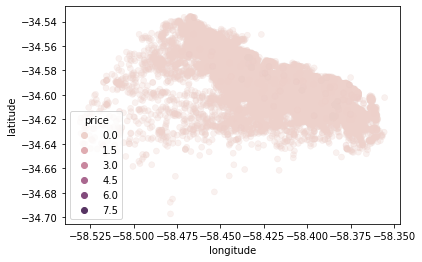

In [39]:
sns.scatterplot(x='longitude',y='latitude',data=df_listings,hue='price',alpha=0.3,edgecolor=None)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

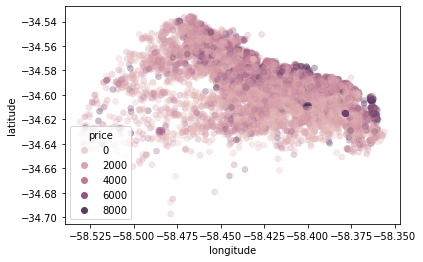

In [40]:
sns.scatterplot(x='longitude',y='latitude',data=df_listings_without_outliers,hue='price',alpha=0.3,edgecolor=None)

With the original dataset it's impossible to identify the expensive places. 

In [41]:
expansive_df=df_listings_without_outliers[(df_listings_without_outliers['longitude']>-58.375) & (df_listings_without_outliers['longitude']<-58.35)].sort_values('price',ascending=False)

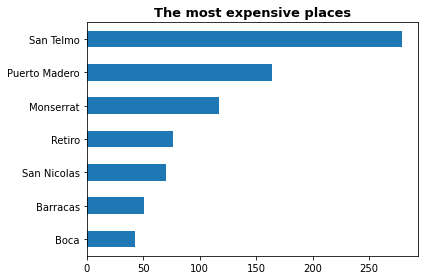

In [42]:
plt.title("The most expensive places", fontsize=13, weight='bold');
(expansive_df['neighbourhood'].head(800).value_counts(ascending=True)[-10:]).plot(kind = "barh")
plt.tight_layout()

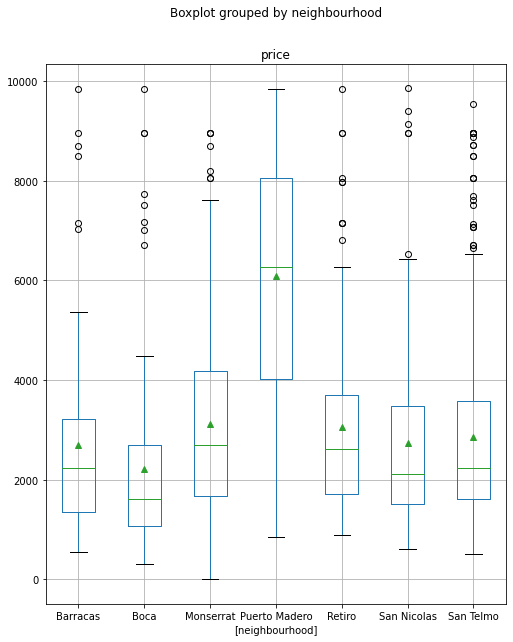

In [43]:
expansive_df.boxplot(column = ["price"], by = ["neighbourhood"], figsize = (8,10), showmeans=True);

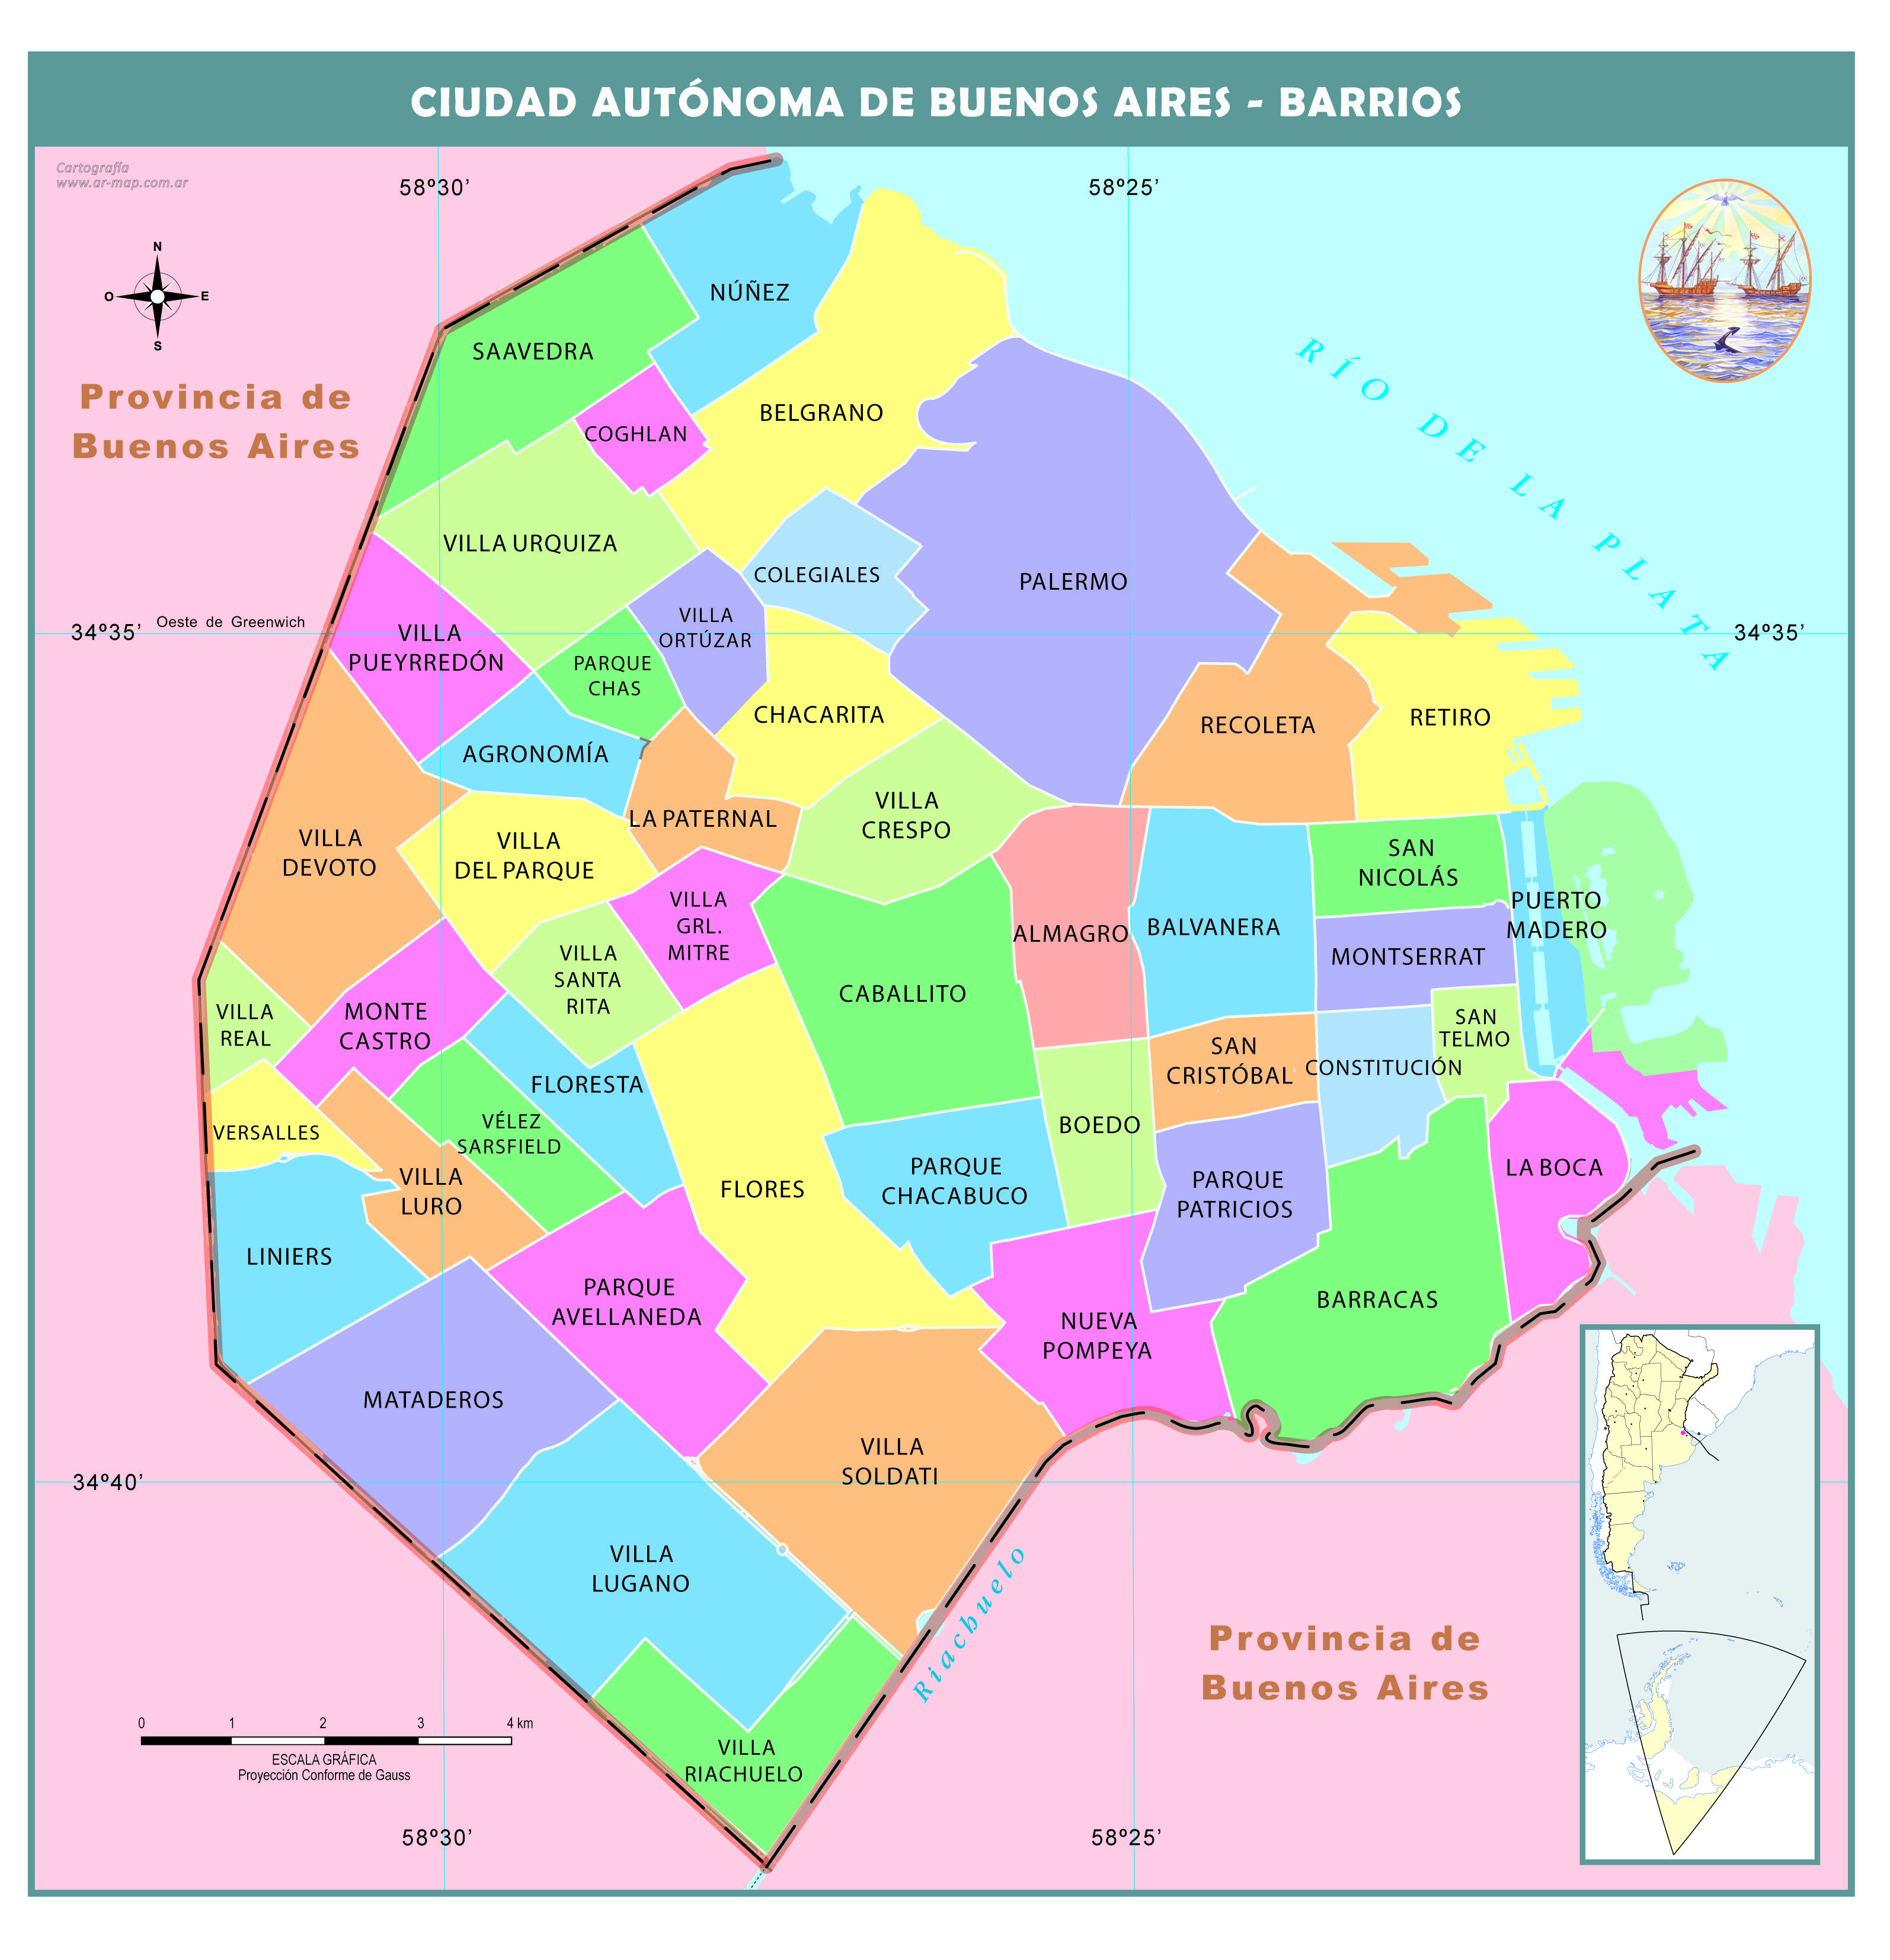

In [44]:
from IPython.display import Image
Image(filename=path+ '/images/buenos_aires_map.jpg') 

Repair how we have the same form in both maps.

**Answer:** 

Based on a dataset clean of outliers, answering the question about location, it’s clear that the longitude between -58.375 and -58.350 have the most expensive places.

Beyond that, there's a lot of concentration of places to travel on Airbnb at the coast. Puerto Madero and Vila Soldati are almost the double media than the others.

Instead San Telmo appears with the most occurences neigborood, but when the analysis is with mean, is down, besides that, has some outliers. Another interisting case is of San Nicolas, that have one outlier with the price of 8946021.0. According with this examples, it's complicated uses always the mean for analysing, sometimes is good look at a table as command 37, that order the values based on the high 50% values.

### <a id="da5">5. What's the best period of the year to travel to Buenos Aires?</a>

**It's important to remember that prices in the future are just the prices now. But, they can change along the year for more or less.**

In [45]:
df_calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6283,2021-02-24,t,4473.0,4473.0,3.0,30.0
1,53097,2021-02-24,f,3578.0,3578.0,2.0,1125.0
2,53097,2021-02-25,f,3578.0,3578.0,2.0,1125.0
3,53097,2021-02-26,f,3578.0,3578.0,2.0,1125.0
4,53097,2021-02-27,f,3578.0,3578.0,2.0,1125.0
...,...,...,...,...,...,...,...
7389037,48278756,2022-02-19,t,2990.0,2990.0,2.0,1125.0
7389038,48278756,2022-02-20,t,2980.0,2980.0,2.0,1125.0
7389039,48278756,2022-02-21,t,2980.0,2980.0,2.0,1125.0
7389040,48278756,2022-02-22,t,2980.0,2980.0,2.0,1125.0


In [46]:
calendar_columns = list(df_calendar.columns)

In [47]:
df_calendar_without_outliers = pd.merge(df_calendar, df_listings_without_outliers, how='inner', left_on=['listing_id'], right_on = ['id'], suffixes=('', '_right'))
df_calendar_without_outliers = df_calendar_without_outliers[calendar_columns]

Removing all outliers as the "listings.csv".

In [48]:
print('We have', df_calendar_without_outliers.date.nunique(), 'days and', df_calendar_without_outliers.listing_id.nunique(), 'unique listings in the calendar data.')

We have 369 days and 19179 unique listings in the calendar data.


In [49]:
print('The dataset have value of this period {}: '.format(df_calendar_without_outliers.date.min(), df_calendar_without_outliers.date.max()))

The dataset have value of this period 2021-02-23: 


In [50]:
df_calendar_without_outliers.available.value_counts()
df_calendar_without_outliers.available.value_counts(normalize= True)

t    0.64942
f    0.35058
Name: available, dtype: float64

<ipython-input-51-cd6534822743>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)


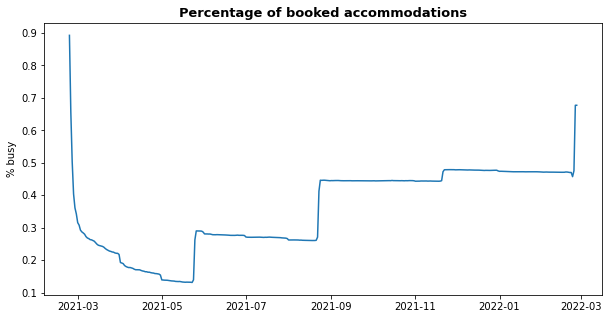

In [51]:
calendar_new = df_calendar_without_outliers[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Percentage of booked accommodations', fontsize=13, weight='bold')
plt.ylabel('% busy')
plt.show();

Above, we have the rate of occupation. Note that the current month is high. But, it's interesting that in May, the rate is very low, in comparision with another months.

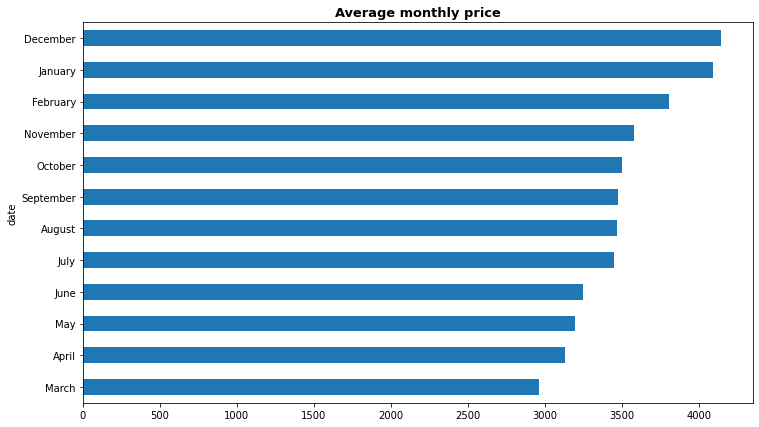

In [52]:
df_calendar_without_outliers['date'] = pd.to_datetime(df_calendar_without_outliers['date'])
mean_of_month = df_calendar_without_outliers.groupby(df_calendar_without_outliers['date'].dt.strftime('%B'), sort=False)['price'].mean().sort_values(ascending = True)

mean_of_month.plot(kind = 'barh' , figsize = (12,7))

plt.title('Average monthly price', fontsize=13, weight='bold' );
plt.savefig(path+ "/images/Average monthly price.png")

<Figure size 864x504 with 0 Axes>

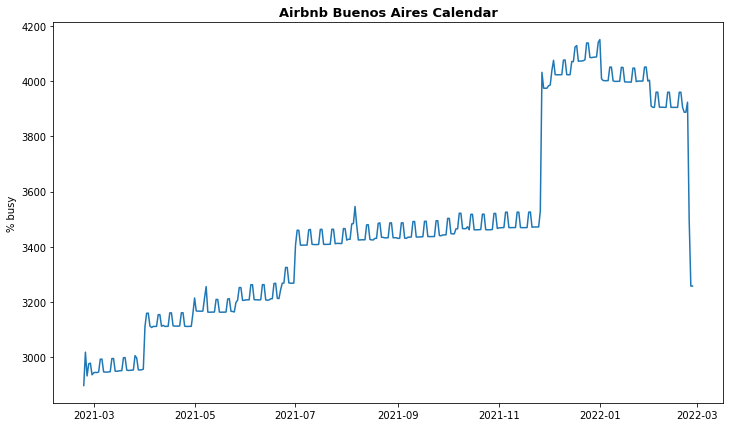

In [53]:
plt.figure(figsize = (12, 7))
calendar_new = df_calendar_without_outliers[['date', 'adjusted_price']]
calendar_new = calendar_new.groupby('date')['adjusted_price'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])
plt.figure(figsize=(12, 7))
plt.plot(calendar_new['date'], calendar_new['adjusted_price'])
plt.title('Airbnb Buenos Aires Calendar', fontsize=13, weight='bold' )
plt.ylabel('% busy')
plt.show();

The plot above shows some valleys and peaks, probably it's is the weekends. Let's check it and bring the mean price of month to make the analysis easier.

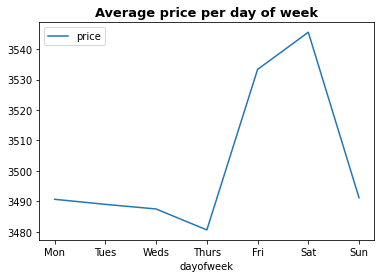

In [54]:
df_calendar_without_outliers['dayofweek'] = df_calendar_without_outliers.date.dt.day_name()

calendar = df_calendar_without_outliers[['dayofweek', 'price', 'date']]
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calendar[['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.plot()
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.title('Average price per day of week', fontsize = 13, weight = 'bold')
plt.xticks(ticks, labels);

As it had mentioned before, the peaks are the weekends. On Saturday's the price is about 60$ more than Thursday's.

In [55]:
def get_order_list(df):
    """ 
    INPUT:
    df - dataframe that contains the week to order correctly
    
    OUTPUT:
    order_list - a list for the correct ordering of the month since now
    
    OBJECTIVE: Create a list for the correct ordering of the month since now.
    """
    #return the initial week
    firs_week = int(df.index.week[0])
    number_of_weeks = 52+1

    order_list = []
  
    for i in range(firs_week, number_of_weeks):
        order_list.append(i)
    for i in range(1, firs_week):
        order_list.append(i)

    return order_list

<ipython-input-55-3e18e7b15ef5>:12: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  firs_week = int(df.index.week[0])
<ipython-input-56-96ce3cadb2e3>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sns.pointplot(x = df_calendar_without_outliers.index.week, y = df_calendar_without_outliers["price"], order = order_list)




Overall average price during the year: 3499.41 $




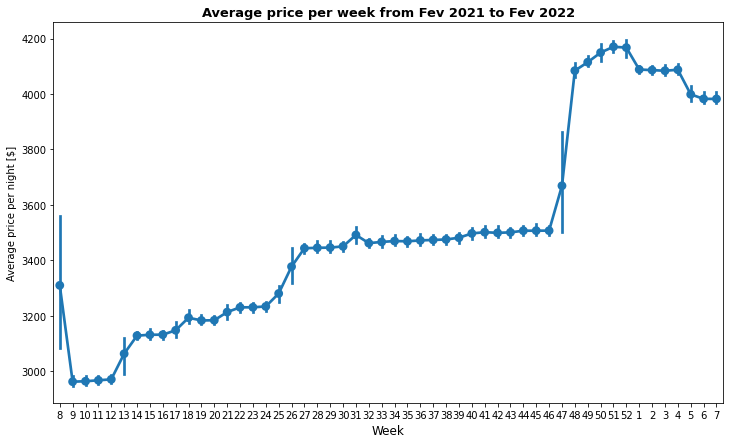

In [56]:
df_calendar_without_outliers = df_calendar_without_outliers.groupby(pd.Grouper(key = 'date',freq ='1D')).mean()

order_list = get_order_list(df_calendar_without_outliers)

plt.figure(figsize = (12, 7))
sns.pointplot(x = df_calendar_without_outliers.index.week, y = df_calendar_without_outliers["price"], order = order_list)
plt.title('Average price per week from Fev 2021 to Fev 2022', fontsize = 13, weight = 'bold')
plt.xlabel('Week', fontsize = 12)
plt.ylabel('Average price per night [$]')
plt.savefig(path+ "/images/price_per_week.png")
print("\n\nOverall average price during the year: {:.2f} $\n\n".format(np.mean(df_calendar_without_outliers.price)))

With the analysis of the month of february, this month is the cheaper one. But, it's important to pay attention if it's cheaper because it always like this or if it was because of the snapshot of this current month that influenced this result.

## <a id="con">VI: Conclusion</a>

In this notebook, we tried to answer 5 questions from Buenos Aires.

**1. What’s the most common accommodation per type of room?**
The most popular is entire home/apt representing with 78.7% of total.


**2. What’s the most frequency neighborhood?** Palermo and Recoleta together have almost 60%, which shows a very concentrated amount of bookings in those areas.

**3. How’s the interaction between price and type of accomodation?** The shared types of booking as private room and shared room are cheaper than the entire room apt/home and hotel room, it is almost half of the average price.

**4. How’s the interaction between price and location?** Puerto Madero and Vila Soldati are almost the double media than the others.

**5. What’s the best period of the year to travel to Buenos Aires?** According to this dataset, the closest weeks are cheaper than the others. To confirm this, it is necessary to look for the next data publication of AirBnB. To check if this behaviour will happen.